In [12]:
import os
import math
import pandas as pd
from math import pi

# Set folder path and coefficient values
folder_path = './yolov5-master/runs/detect/exp2/labels/'
a_value = 0.0002153
b_value = 0.02486

# Create an empty DataFrame to store data
data = pd.DataFrame(columns=["File", "Line", "R", "V", "Area"])

# Iterate through all .txt files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            lines = file.readlines()

            for line in lines:
                parts = line.strip().split()
                if len(parts) >= 5:
                    # Get width and height values from each line
                    width, height = float(parts[3]), float(parts[4])
                    # Calculate R value
                    r_value = (width + height) / 2
                    # Calculate V value
                    v_value = a_value * r_value**3 + b_value * r_value**2
                    area = (r_value / 2)**2 * pi
                    # Append results to the DataFrame
                    data = pd.concat([data, pd.DataFrame({"File": [filename], "Line": [line.strip()], "R": [r_value], "V": [v_value], "Area": [area]})])

# Save the DataFrame to a CSV file
data.to_csv("Question4.csv", index=False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6712\751468812.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, pd.DataFrame({"File": [filename], "Line": [line.strip()], "R": [r_value], "V": [v_value], "Area": [area]})])


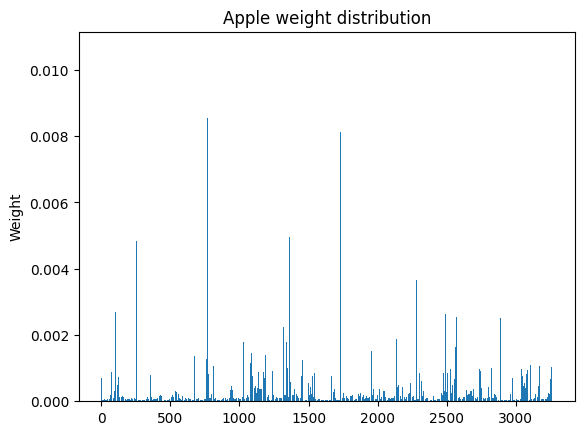

In [13]:
data=pd.read_csv('./Question4.csv')
import matplotlib.pyplot as plt
plt.bar(range(len(data['V'])),data['V'])
plt.title('Apple weight distribution')
plt.ylabel('Weight')
plt.savefig('Question4.png',dpi=1200)
plt.show()